# Testing LOSD
### Bevölkerung nach Stadtquartier, seit 1941

Wirtschaftliche Wohnbevölkerung der Stadt Zürich nach Statistischem Stadtquartier und Jahr, seit 1941.
https://data.integ.stadt-zuerich.ch/dataset/bev324od3240

Datum: 12.02.2024

### Colab
Mit Colab kann das Jupyter-Notebook interaktiv im Browser gestartet werden.

Klicke auf den Button:

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DonGoginho/colab/blob/main/losd/colab_bev3240_losd_bev_bestand_jahr_quartier_od3240.ipynb)


### Importiere die notwendigen Packages

In [98]:
#%pip install altair datetime folium geopandas io requests matplotlib numpy pandas seaborn plotly
!pip install altair==5.0.1 vl-convert-python

In [99]:
import altair as alt
import datetime
import folium
import geopandas as gpd
import io
from IPython.display import Markdown as md
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import pivottablejs
#from pivottablejs import pivot_ui
import plotly.express as px
import requests
import seaborn as sns

Importiere die eigenen Funktionen, die unter ../0_scripts abegelegt sind:

1) Klone das Github-Repo auf Colab. Sonst werden die Skripts nicht gelesen...

In [100]:
!git clone https://github.com/DonGoginho/colab.git


fatal: destination path 'colab' already exists and is not an empty directory.


2) Checke die Schreibrechte in den geklonten Verzeichnissen

In [101]:
!ls -l /content/colab
!ls -l /content/colab/losd


total 20
drwxr-xr-x 4 root root 4096 Feb 26 12:39 0_scripts
drwxr-xr-x 2 root root 4096 Feb 26 12:39 archiv
-rw-r--r-- 1 root root 1211 Feb 26 12:39 LICENSE
drwxr-xr-x 5 root root 4096 Feb 26 12:39 losd
-rw-r--r-- 1 root root 2980 Feb 26 12:39 README.md
total 16904
-rw-r--r-- 1 root root 2165988 Feb 26 12:39 colab_b_bau5022_losd_bau_neubau_whg-projektiert_projstatus_zizahl_quartier_seit2009_od5022.ipynb
-rw-r--r-- 1 root root 1291554 Feb 26 12:39 colab_b_bau5231_losd_bau_geschossflaeche_nutzungsart_quartier_bp_bau523od5231.ipynb
-rw-r--r-- 1 root root 7018878 Feb 26 12:39 colab_b_bau6120_losd_bau_bodennutzung_bau612od6120.ipynb
-rw-r--r-- 1 root root  219185 Feb 26 12:39 colab_bev3160_losd_bev_bestand_jahr_konfession_od3160.ipynb
-rw-r--r-- 1 root root 1757949 Feb 26 12:39 colab_bev3240_losd_bev_bestand_jahr_quartier_od3240.ipynb
-rw-r--r-- 1 root root  699228 Feb 26 12:39 colab_bev3241_losd_bev_bestand_jahr_statzonen_od3241.ipynb
-rw-r--r-- 1 root root 1154338 Feb 26 12:39 colab_bev32

3) Importiere die Skripts

In [102]:
import sys
sys.path.append('/content/colab/0_scripts')

import my_py_dataviz_functions as mypy_dv
import my_py_dataloading_functions as mypy_dl

In [103]:
SSL_VERIFY = False
# evtl. SSL_VERIFY auf False setzen wenn die Verbindung zu https://www.gemeinderat-zuerich.ch nicht klappt (z.B. wegen Proxy)
# Um die SSL Verifikation auszustellen, bitte die nächste Zeile einkommentieren ("#" entfernen)
# SSL_VERIFY = False

In [104]:
if not SSL_VERIFY:
    import urllib3
    urllib3.disable_warnings()

### Settings
Definiere Settings.
Hier das Zahlenformat von Float-Werten (z.B. *'{:,.2f}'.format* mit Komma als Tausenderzeichen)

In [105]:
#pd.options.display.float_format = lambda x : '{:,.1f}'.format(x) if (np.isnan(x) | np.isinf(x)) else '{:,.0f}'.format(x) if int(x) == x else '{:,.1f}'.format(x)
pd.options.display.float_format = '{:.0f}'.format
pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 15)

#### Zeitvariabeln

In [106]:
#Zeitvariabeln als Strings:
now = datetime.date.today()
year_today = now.strftime("%Y")
date_today = "_"+now.strftime("%Y-%m-%d")

#Zeitvariabeln als Integers:
int_times = now.timetuple()
aktuellesJahr = int_times[0]
aktuellerMonat = int_times[1]
selectedMonat = int_times[1]-2
#print(aktuellesJahr, aktuellerMonat,'datenstand: ', selectedMonat, int_times)

### Daten importieren und Metadaten checken

- status: int / prod
- data_source: web / ld / dropzone
- datums_attr: beschreibt das oder die Datumsfelder, die als Datum geparsed werden sollen. Falls es keines gibt: None

**BITTE HIER ANPASSEN**

In [107]:
package_name = "bev324od3240"

In [108]:
data2betested = mypy_dl.load_data(
    status = 'int'
    , data_source = 'ld'
    , package_name = package_name
    , dataset_name = "bev324od3240.csv"
    , datums_attr = ['ZEIT_LANG']
    )

fp lautet:https://ld.integ.stzh.ch/statistics/view/BEV324OD3240/observation?format=csv


 **Überprüfe die Metadaten:**

 **Dataset auf INTEG-Datakatalog:** Link https://data.integ.stadt-zuerich.ch/dataset/bev324od3240 

 **View auf INTEG-LD:** Link https://ld.integ.stzh.ch/statistics/view/BEV324OD3240 

data_source: web


In [109]:
data2betested.head(2)

,ZEIT_LANG,ZEIT_CODE,RAUM_LANG,RAUM_CODE,DATENSTATUS,BEW,KREISEZH_LANG,KREISEZH_CODE
0,2009-12-31,Z31122009,Saatlen,R00121,Veröffentlicht,7132,altes Quartier Schwamendingen (1934-1969); Kre...,R01700
1,2023-12-31,Z31122023,Mühlebach,R00082,Veröffentlicht,6494,Kreis 8 (ab 1915),R01100


Berechne weitere Attribute falls notwendig

In [110]:
data2betested = (
    data2betested
    .copy()
    .assign(
        #Aktualisierungs_Datum_str= lambda x: x.Aktualisierungs_Datum.astype(str),
        StichtagDatJahr = lambda x: x.ZEIT_LANG,
        StichtagDatJahr_str = lambda x: x.ZEIT_LANG.astype(str),
        Jahr = lambda x: x.ZEIT_LANG.dt.year,
        #Jahr_nbr = lambda x: x.ZEIT_CODE.str[-4:].astype(int),
        RAUM_my_sort = lambda x: x.RAUM_CODE.str[-3:].astype(int),

    )
    .sort_values('ZEIT_LANG', ascending=False)
    )
data2betested

,ZEIT_LANG,ZEIT_CODE,RAUM_LANG,RAUM_CODE,DATENSTATUS,BEW,KREISEZH_LANG,KREISEZH_CODE,StichtagDatJahr,StichtagDatJahr_str,Jahr,RAUM_my_sort
505,2023-12-31,Z31122023,Enge,R00024,Veröffentlicht,10035,Kreis 2 (ab 1893),R00200,2023-12-31,2023-12-31,2023,24
2611,2023-12-31,Z31122023,Affoltern,R00111,Veröffentlicht,27165,Kreis 11 (ab 1970),R01800,2023-12-31,2023-12-31,2023,111
1719,2023-12-31,Z31122023,Unterstrass,R00061,Veröffentlicht,24801,Kreis 6 (ab 1934),R01200,2023-12-31,2023-12-31,2023,61
2528,2023-12-31,Z31122023,Langstrasse,R00042,Veröffentlicht,11982,Kreis 4 (ab 1915),R00700,2023-12-31,2023-12-31,2023,42
1674,2023-12-31,Z31122023,Wollishofen,R00021,Veröffentlicht,21181,Kreis 2 (ab 1893),R00200,2023-12-31,2023-12-31,2023,21
...,...,...,...,...,...,...,...,...,...,...,...,...
910,1941-12-31,Z31121941,Werd,R00041,Veröffentlicht,7653,Kreis 4 (ab 1915),R00700,1941-12-31,1941-12-31,1941,41
2444,1941-12-31,Z31121941,Lindenhof,R00013,Veröffentlicht,3671,Kreis 1 (Stadtgebiet vor 1893),R10000,1941-12-31,1941-12-31,1941,13
2115,1941-12-31,Z31121941,Enge,R00024,Veröffentlicht,13850,Kreis 2 (ab 1893),R00200,1941-12-31,1941-12-31,1941,24
1808,1941-12-31,Z31121941,Leimbach,R00023,Veröffentlicht,1177,Kreis 2 (ab 1893),R00200,1941-12-31,1941-12-31,1941,23


Zeitbereich aus den Daten:

In [111]:
data_max_date = str(max(data2betested.ZEIT_LANG).year)
data_min_date = str(min(data2betested.ZEIT_LANG).year)

print(f"Die Daten haben ein Minimumjahr von {data_min_date} und ein Maximumjahr von {data_max_date}")


Die Daten haben ein Minimumjahr von 1941 und ein Maximumjahr von 2023


Temp speichere die csv-Datei, da es immer wieder zu Ausfällen kommt. So kann ich mal den Report fertig bauen.

In [112]:
docname = package_name +date_today+".csv"
print(docname)


bev324od3240_2025-02-26.csv


In [113]:
data2betested.to_csv('/content/colab/losd/saved_data/'+docname, index=False)

### Einfache Datentests

In [114]:
data2betested.head(2).T

,505,2611
ZEIT_LANG,2023-12-31 00:00:00,2023-12-31 00:00:00
ZEIT_CODE,Z31122023,Z31122023
RAUM_LANG,Enge,Affoltern
RAUM_CODE,R00024,R00111
DATENSTATUS,Veröffentlicht,Veröffentlicht
BEW,10035,27165
KREISEZH_LANG,Kreis 2 (ab 1893),Kreis 11 (ab 1970)
KREISEZH_CODE,R00200,R01800
StichtagDatJahr,2023-12-31 00:00:00,2023-12-31 00:00:00
StichtagDatJahr_str,2023-12-31,2023-12-31


In [115]:
data2betested.info(memory_usage='deep', verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2717 entries, 505 to 1020
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ZEIT_LANG            2717 non-null   datetime64[ns]
 1   ZEIT_CODE            2717 non-null   object        
 2   RAUM_LANG            2717 non-null   object        
 3   RAUM_CODE            2717 non-null   object        
 4   DATENSTATUS          2717 non-null   object        
 5   BEW                  2717 non-null   float64       
 6   KREISEZH_LANG        2717 non-null   object        
 7   KREISEZH_CODE        2717 non-null   object        
 8   StichtagDatJahr      2717 non-null   datetime64[ns]
 9   StichtagDatJahr_str  2717 non-null   object        
 10  Jahr                 2717 non-null   int32         
 11  RAUM_my_sort         2717 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int32(1), int64(1), object(7)
memory usage: 1.5 MB


In [116]:
print(f'The dataset has {data2betested.shape[0]:,.0f} rows (observations) and {data2betested.shape[1]:,.0f} columns (variables).')
print(f'There seem to be {data2betested.duplicated().sum()} exact duplicates in the data.')

The dataset has 2,717 rows (observations) and 12 columns (variables).
There seem to be 0 exact duplicates in the data.


Welches sind die Quartiere ohne Werte bei BEW?

In [117]:
data2betested[np.isnan(data2betested.BEW)]

,ZEIT_LANG,ZEIT_CODE,RAUM_LANG,RAUM_CODE,DATENSTATUS,BEW,KREISEZH_LANG,KREISEZH_CODE,StichtagDatJahr,StichtagDatJahr_str,Jahr,RAUM_my_sort


### Verwende das Datum als Index

While we did already parse the `datetime` column into the respective datetime type, it currently is just a regular column.
**To enable quick and convenient queries and aggregations, we need to turn it into the index of the DataFrame**

In [118]:
data2betested = data2betested.set_index("StichtagDatJahr")
data2betested = data2betested.sort_index()

In [119]:
data2betested.index.year.unique()

Index([1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
      dtype='int32', name='StichtagDatJahr')

### Beschreibe einzelne Attribute

Beschreibe nicht numerische Attribute

In [120]:
# describe non-numerical features
try:
    with pd.option_context('display.float_format', '{:,.2f}'.format):
        display(data2betested.describe(exclude='number',datetime_is_numeric=True))
except:
    print("No categorical data in dataset.")

No categorical data in dataset.


Beschreibe numerische Attribute

In [121]:
# describe numerical features
try:
    with pd.option_context('display.float_format', '{:,.0f}'.format):
        display(data2betested.describe(include='number'))
except:
    print("No numercial data in dataset.")

,BEW,Jahr,RAUM_my_sort
count,"2,717","2,717","2,717"
mean,"11,617","1,983",63
std,"7,263",24,35
min,634,"1,941",11
25%,"6,025","1,963",33
50%,"10,406","1,984",63
75%,"16,765","2,004",91
max,"36,315","2,023",123


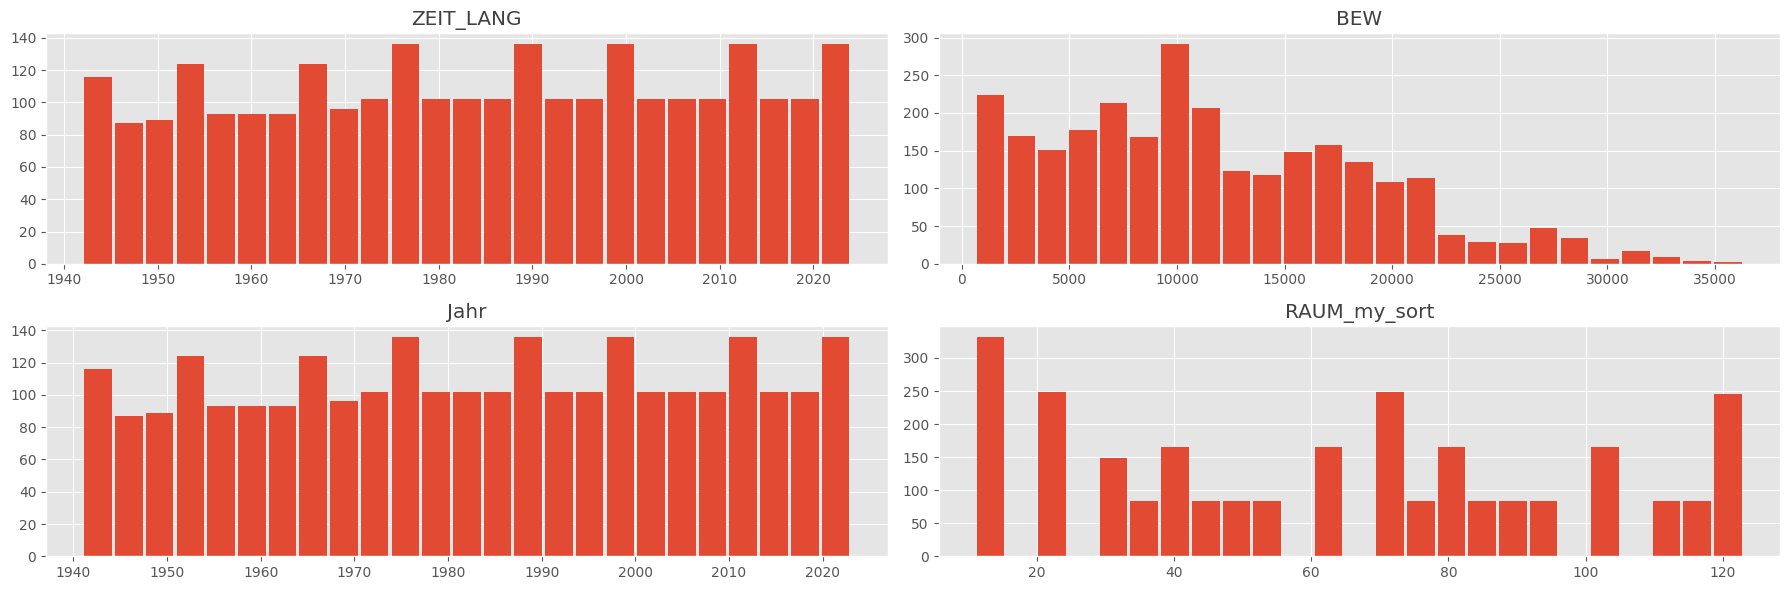

In [122]:
plt.style.use('ggplot')
params = {
    'text.color': (0.25, 0.25, 0.25),
    'figure.figsize': [18, 6],
   }
plt.rcParams.update(params)

try:
    data2betested.hist(bins=25, rwidth=0.9)
    plt.tight_layout()
    plt.show()
except:
    print("No numercial data to plot.")

### Gibt es Duplikate?

In [123]:
# find duplicate rows
duplicate_rows = data2betested[data2betested.duplicated()]
duplicate_rows

,ZEIT_LANG,ZEIT_CODE,RAUM_LANG,RAUM_CODE,DATENSTATUS,BEW,KREISEZH_LANG,KREISEZH_CODE,StichtagDatJahr_str,Jahr,RAUM_my_sort
StichtagDatJahr,,,,,,,,,,,


### Nullwerte und Missings?

In [124]:
data2betested.isnull().sum()

,0
ZEIT_LANG,0
ZEIT_CODE,0
RAUM_LANG,0
RAUM_CODE,0
DATENSTATUS,0
BEW,0
KREISEZH_LANG,0
KREISEZH_CODE,0
StichtagDatJahr_str,0
Jahr,0


In [125]:
# check missing values with missingno
# https://github.com/ResidentMario/missingno
import missingno as msno
#msno.matrix(data2betested, labels=True, sort='descending');
#msno.heatmap(data2betested)

### Gruppierungen

In [126]:
agg_jahr = data2betested.loc[data_min_date:data_max_date]\
    .groupby(['Jahr']) \
    .agg(sum_AnzBestWir=('BEW', 'sum')) \
    .sort_values('Jahr', ascending=False)
agg_jahr.reset_index().head(3)

,Jahr,sum_AnzBestWir
0,2023,447082
1,2022,443037
2,2021,436332


In [127]:
agg_Quarts = data2betested.loc[data_min_date:data_max_date]\
    .groupby(['RAUM_my_sort', 'RAUM_LANG', 'RAUM_CODE']) \
    .agg(sum_AnzBestWir=('BEW', 'sum')) \
    .sort_values('RAUM_CODE', ascending=False)
agg_Quarts.reset_index().head(50)

,RAUM_my_sort,RAUM_LANG,RAUM_CODE,sum_AnzBestWir
0,123,Hirzenbach,R00123,636228
1,122,Schwamendingen-Mitte,R00122,585317
2,121,Saatlen,R00121,381966
3,119,Seebach,R00119,1510720
4,115,Oerlikon,R00115,1602526
5,111,Affoltern,R00111,1401936
6,102,Wipkingen,R00102,1498609
7,101,Höngg,R00101,1435693
8,92,Altstetten,R00092,2191715
9,91,Albisrieden,R00091,1410562


In [128]:
agg_Quarts = data2betested.loc[data_min_date:data_max_date]\
    .groupby(['DATENSTATUS', 'ZEIT_LANG', 'ZEIT_CODE',]) \
    .agg(sum_AnzBestWir=('BEW', 'sum')) \
    .sort_values('ZEIT_CODE', ascending=False)
agg_Quarts.reset_index().head(50)

,DATENSTATUS,ZEIT_LANG,ZEIT_CODE,sum_AnzBestWir
0,Veröffentlicht,2023-12-31,Z31122023,447082
1,Veröffentlicht,2022-12-31,Z31122022,443037
2,Veröffentlicht,2021-12-31,Z31122021,436332
3,Veröffentlicht,2020-12-31,Z31122020,434736
4,Veröffentlicht,2019-12-31,Z31122019,434008
5,Veröffentlicht,2018-12-31,Z31122018,428737
6,Veröffentlicht,2017-12-31,Z31122017,423310
7,Veröffentlicht,2016-12-31,Z31122016,415682
8,Veröffentlicht,2015-12-31,Z31122015,410404
9,Veröffentlicht,2014-12-31,Z31122014,404783


In [129]:
data2betested.columns

Index(['ZEIT_LANG', 'ZEIT_CODE', 'RAUM_LANG', 'RAUM_CODE', 'DATENSTATUS', 'BEW', 'KREISEZH_LANG',
       'KREISEZH_CODE', 'StichtagDatJahr_str', 'Jahr', 'RAUM_my_sort'],
      dtype='object')

### Zeitpunkte und Zeiträume abfragen

A particular powerful feature of the Pandas DataFrame is its indexing capability that also works using time-based entities, such as dates and times. We have already created the index above, so let's put it to use.

In [130]:
data2betested.loc[data_max_date].head(2)
#data2betested.loc["2021-10-31":"2021-11-30"].head(2)

,ZEIT_LANG,ZEIT_CODE,RAUM_LANG,RAUM_CODE,DATENSTATUS,BEW,KREISEZH_LANG,KREISEZH_CODE,StichtagDatJahr_str,Jahr,RAUM_my_sort
StichtagDatJahr,,,,,,,,,,,
2023-12-31,2023-12-31,Z31122023,Leimbach,R00023,Veröffentlicht,6423,Kreis 2 (ab 1893),R00200,2023-12-31,2023,23
2023-12-31,2023-12-31,Z31122023,Höngg,R00101,Veröffentlicht,24674,Kreis 10 (ab 1934),R01500,2023-12-31,2023,101


### Visualisierungen nach Zeitausschnitten

#### Entwicklung Wohnbevölkerung seit ...

In [131]:
myAgg1 = data2betested.loc[data_min_date:data_max_date]\
    .groupby(['StichtagDatJahr','DATENSTATUS']) \
    .agg(sum_WBev=('BEW', 'sum')) \
    .sort_values('StichtagDatJahr', ascending=False)

myAgg1.reset_index().tail(4)

,StichtagDatJahr,DATENSTATUS,sum_WBev
79,1944-12-31,Veröffentlicht,323190
80,1943-12-31,Veröffentlicht,318555
81,1942-12-31,Veröffentlicht,313769
82,1941-12-31,Veröffentlicht,311369


In [132]:
grafik1 = mypy_dv.plot_altair_multiline_highlight(
    data = myAgg1.reset_index().query('sum_WBev>30')
    , x = 'StichtagDatJahr:T'
    , y = 'sum_WBev:Q'
    , myTitle = "Bevölkerungsentwicklung seit "+str(data2betested.index.year.min())
    , x_beschriftung = 'Jahr'
    , y_beschriftung = 'Anz. Personen'
    , warning_status  = "ignore"
    , category='DATENSTATUS'
    , category_beschriftung='DATENSTATUS'
)
grafik1

alt.LayerChart(...)

In [133]:
grafic_name = package_name+"_alt1_total"+date_today+".png"
print('grafiken_testing/'+grafic_name)

grafik1.save('/content/colab/losd/grafiken_testing/'+grafic_name)

grafiken_testing/bev324od3240_alt1_total_2025-02-26.png


#### Entwicklung Wohnbevölkerung nach Stadtquartier seit 1894

In [134]:
data2betested.columns

Index(['ZEIT_LANG', 'ZEIT_CODE', 'RAUM_LANG', 'RAUM_CODE', 'DATENSTATUS', 'BEW', 'KREISEZH_LANG',
       'KREISEZH_CODE', 'StichtagDatJahr_str', 'Jahr', 'RAUM_my_sort'],
      dtype='object')

In [135]:
#myAgg = data2betested.loc["2008-11-30":"2021-10-31"]
myAgg2 = data2betested.loc[data_min_date:data_max_date]\
    .groupby(['StichtagDatJahr', 'RAUM_LANG', 'RAUM_CODE']) \
    .agg(sum_WBev=('BEW', 'sum')) \
    .sort_values('StichtagDatJahr', ascending=True)

myAgg2.reset_index().head(3)

,StichtagDatJahr,RAUM_LANG,RAUM_CODE,sum_WBev
0,1941-12-31,Affoltern,R00111,3347
1,1941-12-31,Wollishofen,R00021,13874
2,1941-12-31,Witikon,R00074,1103


In [136]:
#data = myAgg2.loc['1993':data_max_date].reset_index().query('sum_WBev>30')

grafik2 = mypy_dv.plot_altair_multiline_highlight(
    data = myAgg2.loc[data_min_date:data_max_date].reset_index().query('sum_WBev>30')
    ,x = 'StichtagDatJahr:T'
    ,x_beschriftung = 'Jahr'
    ,y = 'sum_WBev:Q'
    ,y_beschriftung = 'Anz. Personen'
    ,category = "RAUM_LANG"
    ,category_beschriftung= 'Stadtquartier'
    ,warning_status = "ignore" #always or ignore
    ,myTitle="Bevölkerung nach Stadtquartier, seit "+str(data2betested.index.year.min())
)
grafik2

alt.LayerChart(...)

In [137]:
grafic_name = package_name+"_alt2_raum_zeit"+date_today+".png"
print('grafiken_testing/'+grafic_name)

grafik2.save('/content/colab/losd/grafiken_testing/'+grafic_name)

grafiken_testing/bev324od3240_alt2_raum_zeit_2025-02-26.png


#### Entwicklung Wohnbevölkerung nach Stadtquartier der Kreise 10-12, 1941-1981

In [138]:
#myAgg = data2betested.loc["2008-11-30":"2021-10-31"]
myAgg3 = data2betested.loc["1890":"1981"]\
    .groupby(['StichtagDatJahr', 'RAUM_CODE', 'RAUM_LANG', 'RAUM_my_sort']) \
    .agg(sum_WBev=('BEW', 'sum')) \
    .sort_values('StichtagDatJahr', ascending=True)

myAgg3.reset_index().head(3)


,StichtagDatJahr,RAUM_CODE,RAUM_LANG,RAUM_my_sort,sum_WBev
0,1941-12-31,R00011,Rathaus,11,9018
1,1941-12-31,R00119,Seebach,119,7248
2,1941-12-31,R00115,Oerlikon,115,16799


In [139]:
grafik3 = mypy_dv.plot_altair_multiline_highlight(
    data = myAgg3.loc['1941':'1981'].reset_index().query('sum_WBev>30')
    ,x = 'StichtagDatJahr:T'
    ,x_beschriftung = 'Jahr'
    ,y = 'sum_WBev:Q'
    ,y_beschriftung = 'Anz. Personen'
    ,category = "RAUM_LANG"
    ,category_beschriftung= 'Stadtquartier'
    ,warning_status = "ignore" #always or ignore
    ,myTitle="Entwicklung Wohnbevölkerung nach Stadtquartier der Kreise 10-12, 1941-1981"
)
grafik3

alt.LayerChart(...)

#### Barcharts mit Seaborn

In [140]:
#myAgg = data2betested.loc["2008-11-30":"2021-10-31"]
myAggBar = data2betested.loc["2020":data_max_date]\
    .groupby(['StichtagDatJahr','Jahr', 'RAUM_LANG', 'RAUM_CODE']) \
    .agg(sum_WBev=('BEW', 'sum')) \
    .sort_values('StichtagDatJahr', ascending=True)

myAggBar.reset_index().head(3)

,StichtagDatJahr,Jahr,RAUM_LANG,RAUM_CODE,sum_WBev
0,2020-12-31,2020,Affoltern,R00111,26584
1,2020-12-31,2020,Mühlebach,R00082,6414
2,2020-12-31,2020,Oberstrass,R00063,10824


In [141]:
#help(sns.catplot)

In [142]:
#Stile for the following sns graphs
sns.set_theme(style="whitegrid")

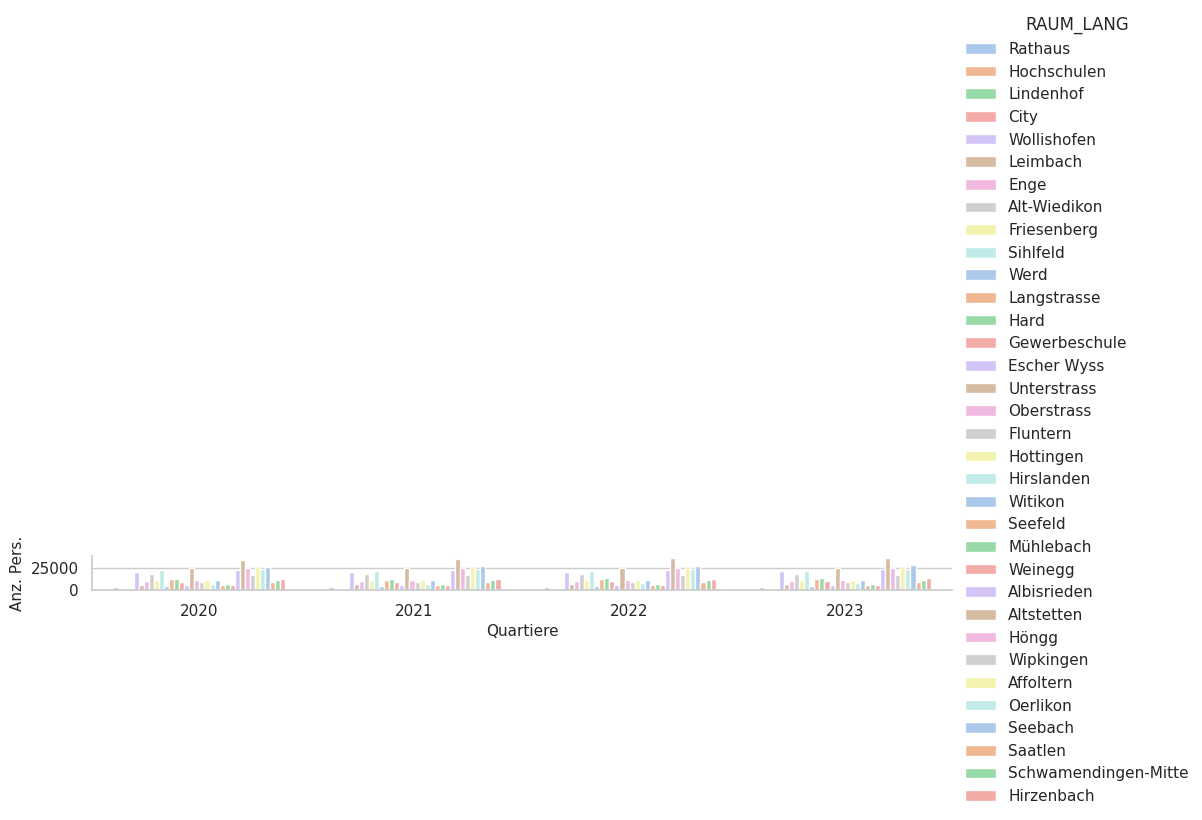

In [143]:
#sns.color_palette("flare", as_cmap=True)
myHist = sns.catplot(x="Jahr"
            , y="sum_WBev"
            , hue="RAUM_LANG"
            , kind="bar" #boxen, violin, --> wenn die aggregation nicht genau den werten in der grafik entspricht
            , palette="pastel" #, color="green"
            , height=5
            , aspect=2
            , order=None, legend_out=True
            ,data=myAggBar.reset_index().sort_values("RAUM_CODE", ascending=True)
           )
myHist.set_xlabels('Quartiere', fontsize=11) # not set_label
myHist.set_ylabels('Anz. Pers.', fontsize=11)


#### Faced Grids

In [144]:
myFG = data2betested.loc[data_min_date:data_max_date]\
    .groupby(['Jahr','StichtagDatJahr_str', 'RAUM_LANG', 'RAUM_CODE', 'RAUM_my_sort']) \
    .agg(sum_WBev=('BEW', 'sum')) \
    .sort_values('RAUM_my_sort', ascending=True)

myFG

,,,,,sum_WBev
Jahr,StichtagDatJahr_str,RAUM_LANG,RAUM_CODE,RAUM_my_sort,
2017,2017-12-31,Rathaus,R00011,11,3266
1981,1981-12-31,Rathaus,R00011,11,3501
1943,1943-12-31,Rathaus,R00011,11,8886
1996,1996-12-31,Rathaus,R00011,11,3078
2016,2016-12-31,Rathaus,R00011,11,3226
...,...,...,...,...,...
2009,2009-12-31,Hirzenbach,R00123,123,11610
1998,1998-12-31,Hirzenbach,R00123,123,11015
1986,1986-12-31,Hirzenbach,R00123,123,11199


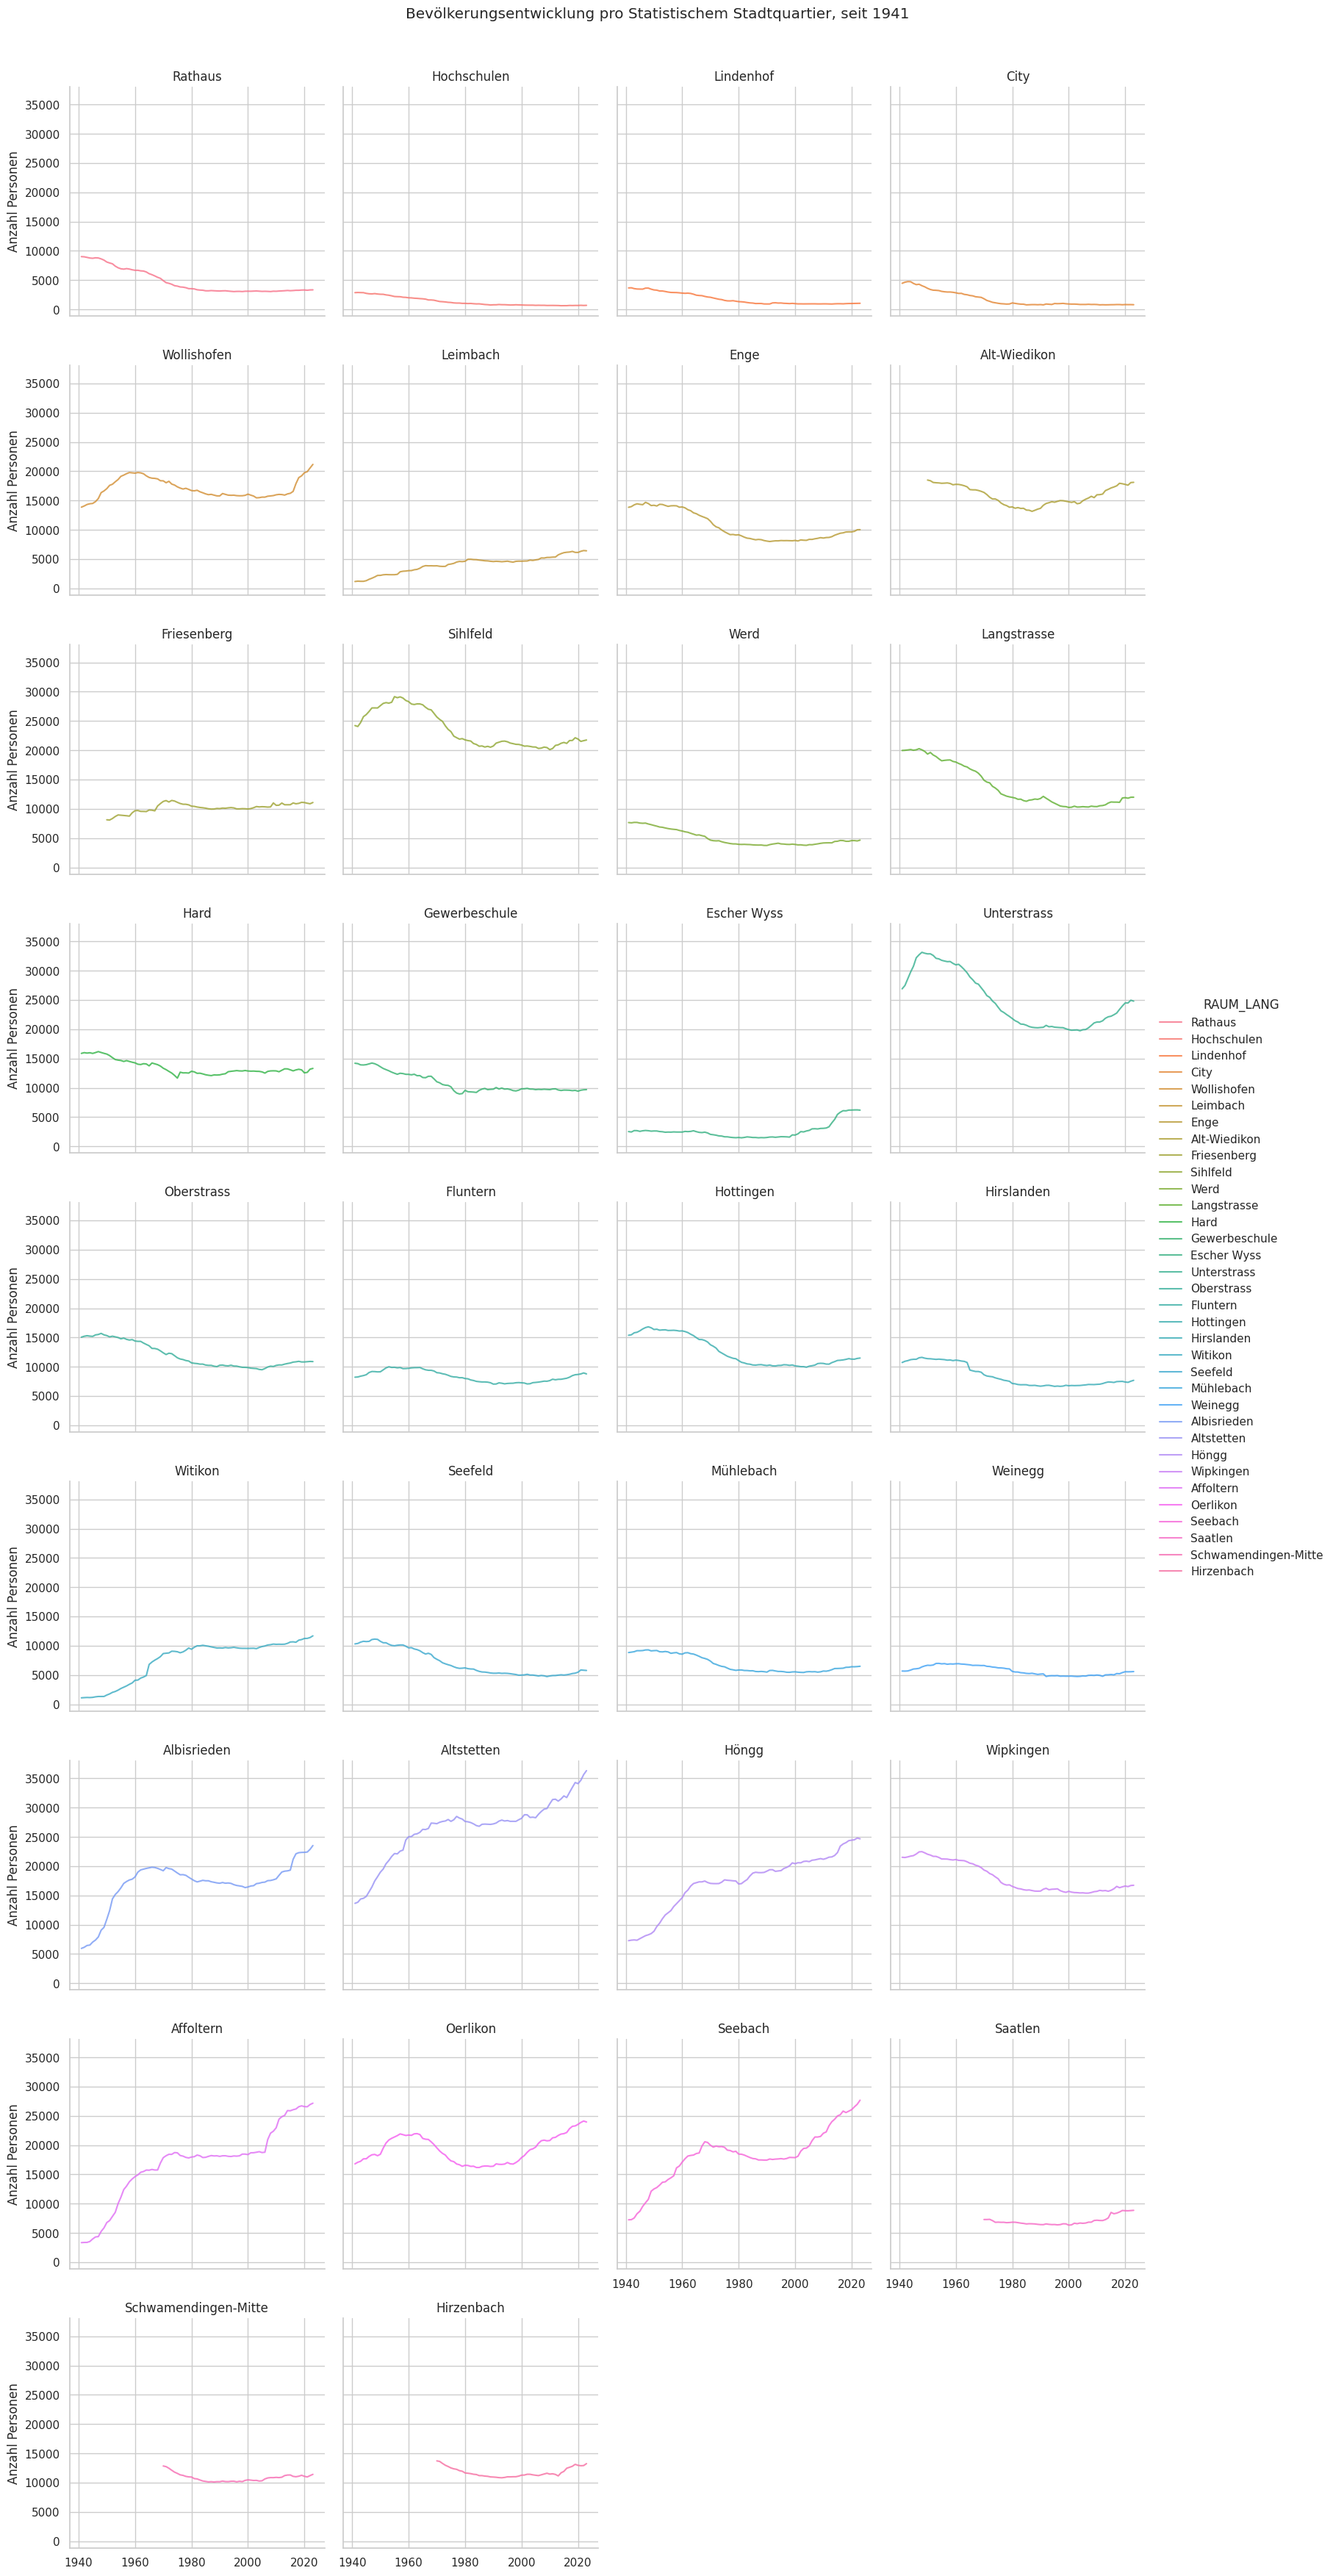

In [145]:
faced_grid1 = mypy_dv.plot_sns_facetgrid(
    data = myFG.reset_index()
    ,col = "RAUM_LANG"
    ,hue = "RAUM_LANG"
    ,col_wrap = 4
    ,height = 3
    ,grafiktyp = sns.lineplot
    ,x = "Jahr"
    ,xlabel = ''
    ,y = "sum_WBev"
    ,ylabel= "Anzahl Personen"
    ,warning_status ="ignore"
    ,myTitle="Bevölkerungsentwicklung pro Statistischem Stadtquartier, seit "+str(data2betested.index.year.min())
)
faced_grid1

In [146]:
grafic_name = package_name+"_fg_quartier_zeit_"+date_today+".png"

print('grafiken_testing/'+grafic_name)


faced_grid1.savefig('/content/colab/losd/grafiken_testing/'+grafic_name)


grafiken_testing/bev324od3240_fg_quartier_zeit__2025-02-26.png


In [147]:
myFG2 = data2betested.loc[data_min_date:data_max_date]\
    .groupby(['Jahr','StichtagDatJahr_str', 'KREISEZH_LANG', 'KREISEZH_CODE', 'RAUM_LANG', 'RAUM_CODE']) \
    .agg(sum_WBev=('BEW', 'sum')) \
    .sort_values('KREISEZH_CODE', ascending=True)

myFG2

sum_WBev
Jahr StichtagDatJahr_str KREISEZH_LANG                  KREISEZH_CODE RAUM_LANG   RAUM_CODE          
1998 1998-12-31          Kreis 2 (ab 1893)              R00200        Leimbach    R00023         4619
1957 1957-12-31          Kreis 2 (ab 1893)              R00200        Leimbach    R00023         2837
                                                                      Enge        R00024        14125
2011 2011-12-31          Kreis 2 (ab 1893)              R00200        Enge        R00024         8684
                                                                      Leimbach    R00023         5340
...                                                                                               ...
1991 1991-12-31          Kreis 1 (Stadtgebiet vor 1893) R10000        Hochschulen R00012          791
                                                                      Lindenhof   R00013          933
                                                                      Rathaus     R00011         3173
1992 1992-12-31          Kreis 1 (Stadtgebiet vor 1893) R10000        Hochschulen R00012          838
1984 1984-12-31          Kreis 1 (Stadtgebiet vor 1893) R10000        Hochschulen R00012          943

[2717 rows x 1 columns]

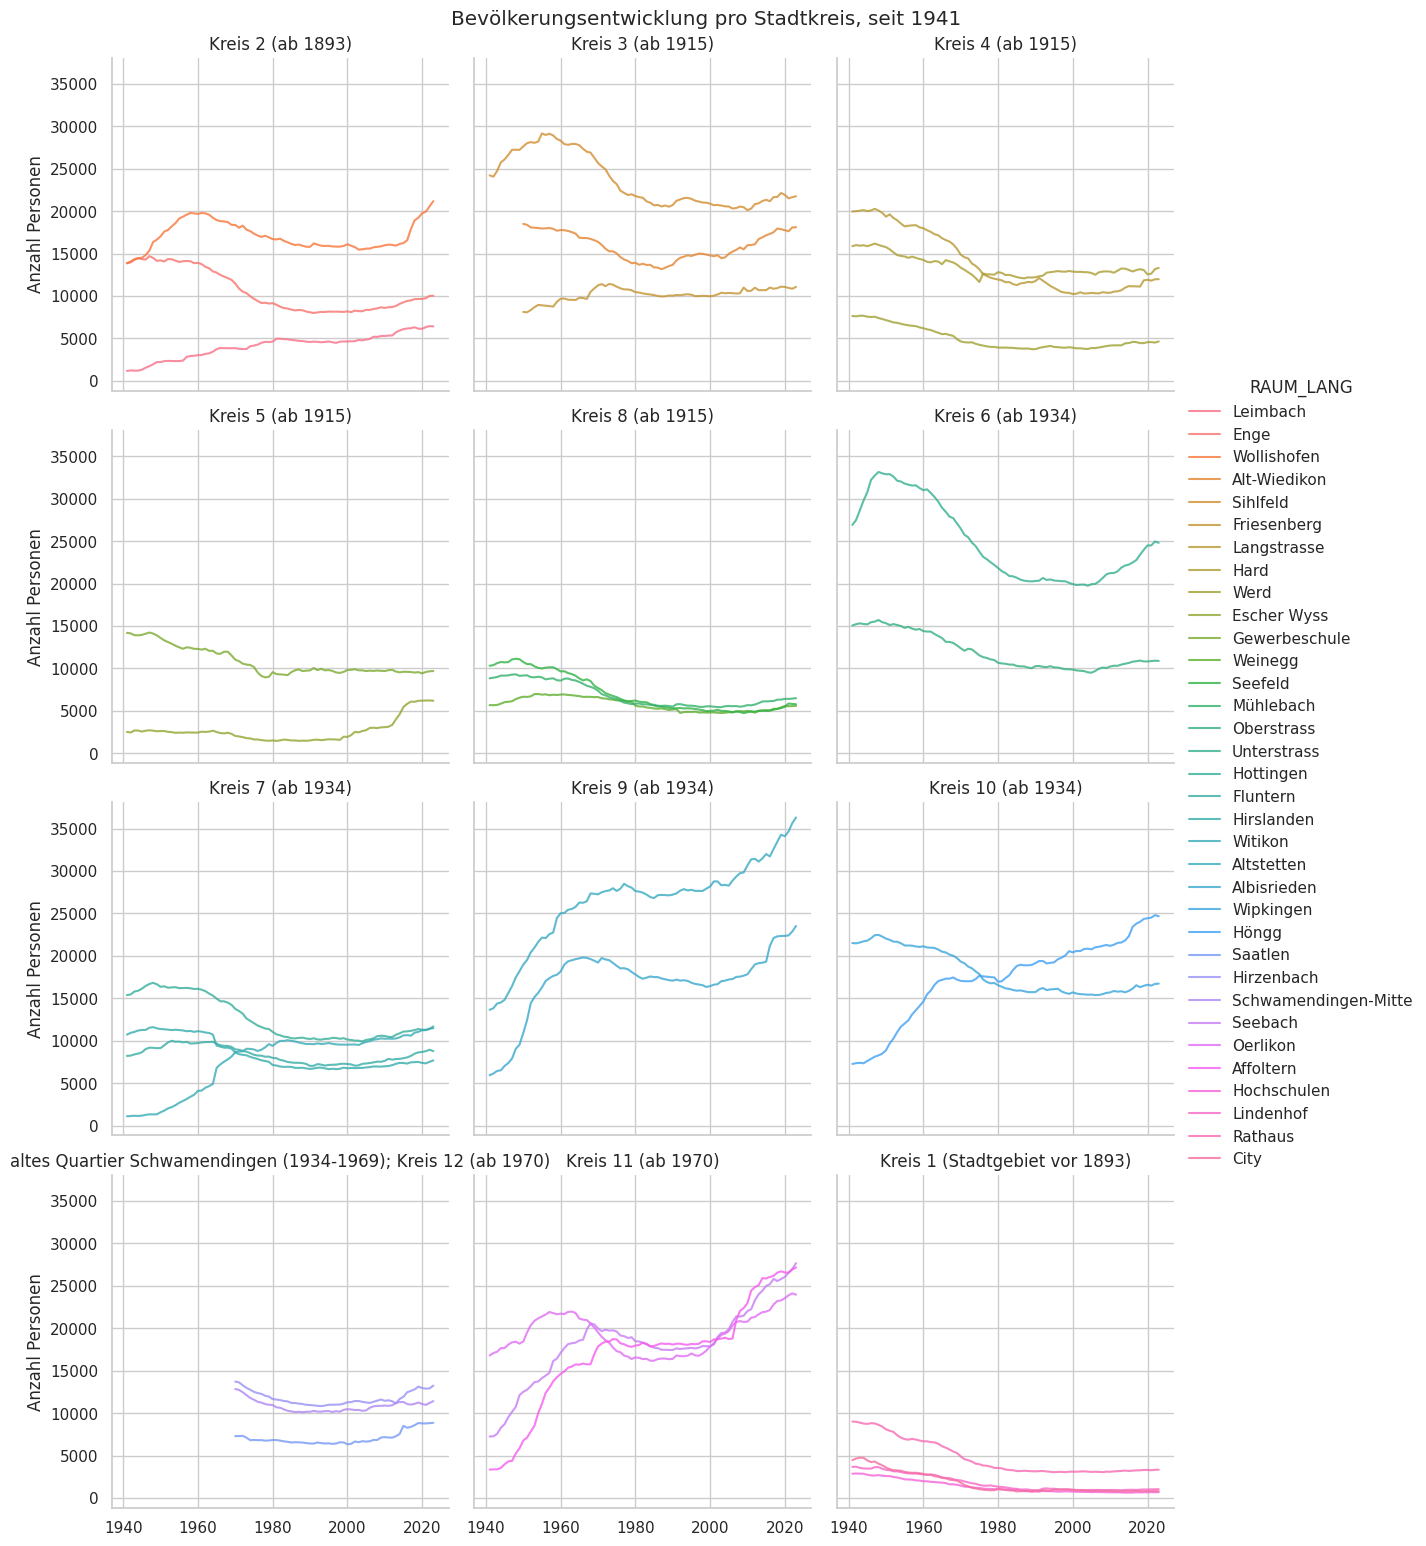

In [148]:
faced_grid2 = mypy_dv.plot_sns_facetgrid(
    data = myFG2.reset_index()
    ,col = "KREISEZH_LANG"
    ,hue = "RAUM_LANG"
    ,col_wrap = 3
    ,height = 4
    ,grafiktyp = sns.lineplot
    ,x = "Jahr"
    ,xlabel = ''
    ,y = "sum_WBev"
    ,ylabel= "Anzahl Personen"
    ,warning_status ="ignore"
    ,myTitle="Bevölkerungsentwicklung pro Stadtkreis, seit "+str(data2betested.index.year.min())
)
faced_grid2

In [149]:
grafic_name = package_name+"_fg_Kreis_quartier_zeit_"+date_today+".png"

print('grafiken_testing/'+grafic_name)


faced_grid2.savefig('/content/colab/losd/grafiken_testing/'+grafic_name)


grafiken_testing/bev324od3240_fg_Kreis_quartier_zeit__2025-02-26.png


## ---------------------- hier Plausi beendet

Übersicht zu LOSD-Jobs:
[Sharepoint](https://kollaboration.intranet.stzh.ch/orga/ssz-produkte/Lists/SASA_Outputs/OGD%20Metadaten.aspx#InplviewHasheb69a2c0-ed94-4ef2-91a5-3b19f038e442=FilterField1%3DMetadaten%255Fx002d%255FPublikations%255Fx00-FilterValue1%3DINT)